# <font color=black> Analysis - FC-based parcellation using correlation </font>
<hr style="border:1px solid black">

In [1]:
import sys,json
import glob, os
import numpy as np
import nibabel as nib
import time
from nilearn import datasets, plotting, image, surface
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from fc_based_parcellation import FC_Parcellation

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Initialization
<hr style="border:0.5px solid black">

### Load existing configuration file ...

In [94]:
# Load the config file with all information
filetag = "C1toC7_gm_07_to_iCAP_SMC"
with open('../../../brain_spine/results/fc_parcellation/corr/' + filetag + '/config_' + filetag + '.json') as config_file:
    config = json.load(config_file)
source = 'spinalcord'
target = 'brain'
config['brain_surfaces']='/templates/surf/'
# Instantiate class
# Note: this will save a config file with all relevant information and prepare folder structure
fc_parcellation = FC_Parcellation(config,source,target,'corr')
colors = ["#1A04A4",'#0070FF','#07F6E0', "#9BFF00",'#E8F703', '#FA9C03', '#FF3A00']
# Create a ListedColormap from the specified colors
discretized_colormap = ListedColormap(colors)

### ... or build new one

In [ ]:
# Load the config file with all information
with open('../../config/config_fc_based_parcellation_NK.json') as config_file:
    config = json.load(config_file)
# Define tag of this analysis (used for saving)
config['output_tag'] = "C1toC7_gm_07_to_iCAP_rFrontoPar"
# Define source, target, and the corresponding masks
source = 'spinalcord'
target = 'brain'
# Note: paths should be with respect to main directory
config['file_tag']['spinalcord'] = "_task-rest_bold_stc_sc_moco_brsc_BP_inTemplate_s.nii.gz"
config['file_tag']['brain'] = "_task-rest_bold_stc_brain_moco_brsc_BP_reg_SPM_inTemplate2mm_s.nii.gz"
config['template']['spinalcord'] = "/templates/PAM50_hc_project/template/PAM50_t2.nii.gz"
config['spinal_levels'] = "/templates/PAM50_hc_project/template/PAM50_spinal_levels_C1C7.nii.gz"
config['masks']['source'] = "/templates/PAM50_hc_project/template/PAM50_gm_bin07_C1C7.nii.gz"
config['masks']['target'] = "/analysis/masks/brain/iCAPs_z_rFrontoPar_bin.nii.gz"

config['brain_surfaces']='/templates/surf/'

config['list_subjects'] = ["P030", "P099","A006","A007","A008","A009","A011","A013","A023","A024","A025","A026","A027","A028","A029","A030","A032","A033","A034","A036","A037","A038","A039","A043","A044","A045","A046","A048","A050","A051","A052"]

# Instantiate class
# Note: this will save a config file with all relevant information and prepare folder structure
fc_parcellation = FC_Parcellation(config,source,target,'corr')
colors = ["#1A04A4",'#0070FF','#07F6E0', "#9BFF00",'#E8F703', '#FA9C03', '#FF3A00']
# Create a ListedColormap from the specified colors
discretized_colormap = ListedColormap(colors)

# Analyses
<hr style="border:0.5px solid black">

### Compute the voxelwise correlation & compute mean across participants

In [ ]:
start = time.time()
# Loop through the subjects to compute fc 
for sub_id,sub in enumerate(fc_parcellation.config['list_subjects']): 
    print(f'\033[1mSUBJECT {sub}\033[0m')
    # Compute correlation without saving files
    fc_parcellation.compute_voxelwise_fc(sub=sub, 
                                        overwrite=False)
# Compute means
fc_parcellation.compute_mean_fc_sim(overwrite=False)
print("\033[1m... Operation performed in %.2f s!\033[0m" % (time.time() - start))

### Conduct leave-one-out validation analyses to check stability and select K

In [ ]:
fc_parcellation.split_half_validity(stability=False,k_selection=True,k_range=range(2,15),reps=20,overwrite=True)

In [ ]:
fc_parcellation.loo_validity(stability=False,k_selection=True,k_range=range(2,21),overwrite=False)

In [ ]:
indiv_relabeled = np.load('/media/miplab-nas2/Data3/BMPD/hc_project/brain_spine/results/fc_parcellation/corr/C1toC7_gm_07_to_iCAP_SMC/source/sim/K7/indiv_labels_relabeled/C1toC7_gm_07_to_iCAP_SMC_agglom_labels_relabeled_k7.npy')

In [ ]:
fc_parcellation.group_clustering(k_range=7, indiv_algorithm='agglom', features='sim', linkage="average", overwrite=True)

In [ ]:
31//2

In [ ]:
import random

# Generate 15 non-repeating random numbers in the range 0-30
random_numbers = random.sample(range(31), 31//2)

print(random_numbers)

In [ ]:
atlas = [0.956910,0.815702,0.908722,0.712218,0.771548,0.782687,0.920863]
np.std(atlas)

In [ ]:
half2_indices = np.setdiff1d(np.arange(31), random_numbers)
half2_indices

In [ ]:
for sub_id,sub in enumerate(fc_parcellation.config['list_subjects']): 
    print(f'\033[1mSUBJECT {sub}\033[0m')# Run clustering and save labels
    fc_parcellation.run_clustering(take_mean=False,sub=sub,
                                k_range=7,features='sim',algorithm='agglom',
                                save_visplot_sc=False, overwrite=True)

In [ ]:
fc_parcellation.group_clustering(k_range=7, indiv_algorithm='agglom', features='sim', linkage="ward", overwrite=True)


In [ ]:
indiv_relabeled = np.load('/media/miplab-nas2/Data3/BMPD/hc_project/brain_spine/results/fc_parcellation/corr/C1toC7_gm_07_to_iCAP_SMC/source/sim/K7/indiv_labels/C1toC7_gm_07_to_iCAP_SMC_all_agglom_labels_k7_relabeled.npy')

In [ ]:
range(1,6+2)

In [ ]:
from nilearn.maskers import NiftiMasker
seed = NiftiMasker('/media/miplab-nas2/Data3/BMPD/hc_project/templates/PAM50_hc_project/template/PAM50_gm_bin07_C1C7.nii.gz').fit()

In [ ]:
k_maps = np.zeros((7,9000))
for k in range(0,7):
    for sub_id,sub in enumerate(fc_parcellation.config['list_subjects']): 
        k_maps[k,:] = k_maps[k,:] + (indiv_relabeled[sub_id,:]==k).astype(int)
    labels_img = seed.inverse_transform(k_maps[k,:]) 
    labels_img.to_filename('/media/miplab-nas2/Data3/BMPD/hc_project/K' + str(k+1) + '_matching.nii.gz')

In [102]:
fc_parcellation.subject_variability(k_range=7,overwrite=True)

RELABELING
K value(s) = 7
Overwrite results = True
K = 7
... Relabeling sub-P030
... Relabeling sub-P099
... Relabeling sub-A006
... Relabeling sub-A007
... Relabeling sub-A008
... Relabeling sub-A009
... Relabeling sub-A011
... Relabeling sub-A013
... Relabeling sub-A023
... Relabeling sub-A024
... Relabeling sub-A025
... Relabeling sub-A026
... Relabeling sub-A027
... Relabeling sub-A028
... Relabeling sub-A029
... Relabeling sub-A030
... Relabeling sub-A032
... Relabeling sub-A033
... Relabeling sub-A034
... Relabeling sub-A036
... Relabeling sub-A037
... Relabeling sub-A038
... Relabeling sub-A039
... Relabeling sub-A043
... Relabeling sub-A044
... Relabeling sub-A045
... Relabeling sub-A046
... Relabeling sub-A048
... Relabeling sub-A050
... Relabeling sub-A051
... Relabeling sub-A052
... Computed distribution for each K

DONE


In [127]:
def surf_data_from_cifti(data, axis, surf_name):
    assert isinstance(axis, nib.cifti2.BrainModelAxis)
    for name, data_indices, model in axis.iter_structures():  # Iterates over volumetric and surface structures
        if name == surf_name:                                 # Just looking for a surface
            data = data.T[data_indices]                       # Assume brainmodels axis is last, move it to front
            vtx_indices = model.vertex                        # Generally 1-N, except medial wall vertices
            surf_data = np.zeros((vtx_indices.max() + 1,) + data.shape[1:], dtype=data.dtype)
            surf_data[vtx_indices] = data
            return surf_data
    raise ValueError(f"No structure named {surf_name}")

In [2]:
from templateflow import api

# Load the surface
surface = api.get('fsLR', 'surface', density='32k', hemi='L', suffix='inflated')

# Print the path to the surface file
print(surface)

# Get the corresponding T1w anatomical image
anat_image = api.get('fsLR', 'anat', resolution=1)

# Print the path to the anatomical image
print(anat_image)

/home/kinany/.cache/templateflow/tpl-fsLR/tpl-fsLR_den-32k_hemi-L_inflated.surf.gii


Exception: No results found

In [149]:
cifti = nib.load('/media/miplab-nas2/Data3/BMPD/hc_project/sub-01_ses-1_task-motor_level2_zstat_Upperarm-Avg_hp200_s4.dscalar.nii')
cifti_data = cifti.get_fdata(dtype=np.float32)
cifti_hdr = cifti.header
nifti_hdr = cifti.nifti_header
axes = [cifti_hdr.get_axis(i) for i in range(cifti.ndim)]

In [141]:


def decompose_cifti(img):
    data = img.get_fdata(dtype=np.float32)
    brain_models = img.header.get_axis(1)  # Assume we know this
    return (surf_data_from_cifti(data, brain_models, "CIFTI_STRUCTURE_CORTEX_LEFT"),
            surf_data_from_cifti(data, brain_models, "CIFTI_STRUCTURE_CORTEX_RIGHT"))



In [142]:
left, right = decompose_cifti(cifti)
print(left.shape, right.shape)

(32492, 1) (32492, 1)


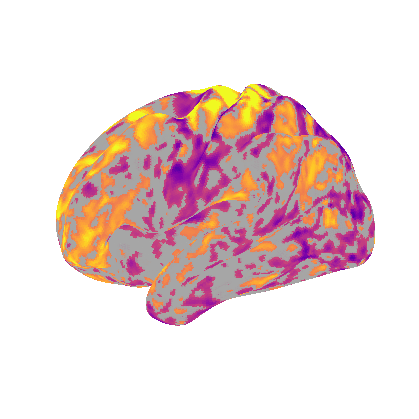

In [150]:
_ = nlp.plot_surf("/home/kinany/.cache/templateflow/tpl-fsLR/tpl-fsLR_den-32k_hemi-L_inflated.surf.gii",
                  surf_data_from_cifti(cifti_data, axes[1], 'CIFTI_STRUCTURE_CORTEX_LEFT').mean(axis=1),threshold=2, vmax=10,
                  cmap='plasma')


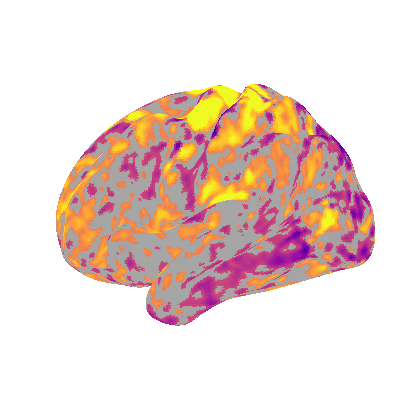

In [148]:
_ = nlp.plot_surf("/home/kinany/.cache/templateflow/tpl-fsLR/tpl-fsLR_den-32k_hemi-L_inflated.surf.gii",
                  surf_data_from_cifti(cifti_data, axes[1], 'CIFTI_STRUCTURE_CORTEX_LEFT').mean(axis=1),threshold=2, vmax=10,
                  cmap='plasma')


In [84]:
import numpy as np
from scipy.optimize import linear_sum_assignment

def compute_similarity(reference_labels, target_labels):
    return np.sum(reference_labels == target_labels)

def relabel_labels(reference_labels, target_labels):
    num_labels = max(reference_labels.max(), target_labels.max())
    similarity = compute_similarity(reference_labels, target_labels)

    # Create an array to store the relabeled target labels
    #relabeled_labels = np.zeros_like(target_labels)

    # Iterate over each unique label in the target labels
    for label in np.unique(target_labels):
        # Extract the indices where the target label occurs
        target_indices = np.where(target_labels == label)

        # Calculate the similarity if we relabel all occurrences of the target label to each possible reference label
        # Choose the reference label that maximizes the similarity
        best_reference_label = None
        best_similarity = similarity
        for reference_label in np.unique(reference_labels):
            # Relabel the target labels
            relabeled_target_labels = target_labels.copy()
            relabeled_target_labels[target_indices] = reference_label

            # Calculate the similarity after relabeling
            new_similarity = compute_similarity(reference_labels, relabeled_target_labels)

            # Update the best reference label if the similarity improves
            if new_similarity >= best_similarity:
                best_similarity = new_similarity
                best_reference_label = reference_label

        # Map the target label to the best reference label
        relabeled_labels[target_labels == label] = best_reference_label if best_reference_label is not None else 0

    return relabeled_labels

# Example data
num_elements = 20
num_clusters = 7

# Generate example labels for reference and target
#reference_labels = np.random.randint(1, num_clusters + 1, size=num_elements)
#target_labels = np.random.randint(1, num_clusters + 1, size=num_elements)
reference_labels = np.array([1,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4])
target_labels =    np.array([2,2,1,1,1,4,4,4,4,4,4,4,3,3,3,3])
wanted_labels =    np.array([0,0,1,1,1,2,2,2,2,2,2,2,4,4,4,4])

# Relabel the target labels to match the reference labels as closely as possible
relabeled_labels = relabel_labels(reference_labels, target_labels)

print("Reference Labels:")
print(reference_labels)
print("\nTarget Labels (Before Relabeling):")
print(target_labels)
print("\nTarget Labels (After Relabeling):")
print(relabeled_labels)



NameError: name 'relabeled_labels' is not defined

In [88]:
reference_labels = np.array([0,0,0,0,0,1,1,1,1,2,2,2,2,3,3,3])
target_labels =    np.array([1,1,0,0,0,3,3,3,3,3,3,3,2,2,2,2])

In [92]:
cm

array([[3, 2, 0, 0],
       [0, 0, 0, 4],
       [0, 0, 1, 3],
       [0, 0, 3, 0]])

In [90]:
from sklearn.metrics.cluster import contingency_matrix
cm = contingency_matrix(reference_labels, target_labels)
# Count occurrences of each label in the reference labels
label_counts = np.bincount(reference_labels)

# Divide each row of the contingency matrix by the corresponding count
normalized_cm = cm / label_counts[:, None]

In [91]:
normalized_cm

array([[0.6 , 0.4 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.25, 0.75],
       [0.  , 0.  , 1.  , 0.  ]])

In [ ]:
cm_argmax = cm.argmax(axis=0)
cm_argmax

In [ ]:
cm[0,:].argmax()

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
import numpy as np

def relabel_labels(reference_labels, target_labels):
    # Compute contingency matrix to assess overlap between labels
    cm = contingency_matrix(reference_labels, target_labels)
    # Find the label with most overlap
    cm_argmax = cm.argmax(axis=0)

    relabel_mapping = {}
    # Loop through the indiv labels that are maximally overlapping 
    for i in np.unique(cm_argmax):
        # If one indiv label is the "best" one for multiple group labels
        if len(cm_argmax[cm_argmax == i]) > 1: 
            # We check which of the labels has the best overlap
            best = cm[i,:].argmax()
            relabel_mapping[best] = i
            # For the label that are not mapped, we use -1
            for other_lbl in np.where((cm_argmax == i) & (np.arange(len(cm_argmax)) != best))[0]:
                relabel_mapping[other_lbl] = -1
        else:
            relabel_mapping[np.argmax(cm_argmax==i)] = i
    
    # Assign relabeled labels using the relabeling mapping
    relabeled_labels = np.zeros_like(target_labels)
    for j, label in enumerate(target_labels):
        if label in relabel_mapping:
            relabeled_labels[j] = relabel_mapping[label]
    
    return relabeled_labels

# Example data
reference_labels = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3])
target_labels = np.array([1, 1, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2])

# Relabel the target labels to match the reference labels as closely as possible
relabeled_labels = relabel_labels(reference_labels, target_labels)

print("Reference Labels:")
print(reference_labels)
print("\nTarget Labels (Before Relabeling):")
print(target_labels)
print("\nTarget Labels (After Relabeling):")
print(relabeled_labels)



In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(reference_labels, target_labels)
cm


In [ ]:
cm_argmax = cm.argmax(axis=0)
cm_argmax

In [ ]:
import numpy as np

def compute_similarity(reference_labels, target_labels):
    return np.sum(reference_labels == target_labels)

def relabel_labels(reference_labels, target_labels):
    num_labels = max(reference_labels.max(), target_labels.max())
    similarity = compute_similarity(reference_labels, target_labels)

    # Create an array to store the relabeled target labels
    #relabeled_labels = np.zeros_like(target_labels)

    # Iterate over each unique label in the target labels
    for label in np.unique(target_labels):
        # Extract the indices where the target label occurs
        target_indices = np.where(target_labels == label)

        # Calculate the similarity if we relabel all occurrences of the target label to each possible reference label
        # Choose the reference label that maximizes the similarity
        best_reference_label = None
        best_similarity = similarity
        for reference_label in np.unique(reference_labels):
            # Relabel the target labels
            relabeled_target_labels = target_labels.copy()
            relabeled_target_labels[target_indices] = reference_label

            # Calculate the similarity after relabeling
            new_similarity = compute_similarity(reference_labels, relabeled_target_labels)

            # Update the best reference label if the similarity improves
            if new_similarity >= best_similarity:
                best_similarity = new_similarity
                best_reference_label = reference_label

        # Map the target label to the best reference label
        relabeled_labels[target_labels == label] = best_reference_label if best_reference_label is not None else 0

    return relabeled_labels

# Example data
num_elements = 20
num_clusters = 7

# Generate example labels for reference and target
#reference_labels = np.random.randint(1, num_clusters + 1, size=num_elements)
#target_labels = np.random.randint(1, num_clusters + 1, size=num_elements)
reference_labels = np.array([1,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4])
target_labels =    np.array([2,2,1,1,1,4,4,4,4,4,4,4,3,3,3,3])
wanted_labels =    np.array([0,0,1,1,1,2,2,2,2,2,2,2,4,4,4,4])

# Relabel the target labels to match the reference labels as closely as possible
relabeled_labels = relabel_labels(reference_labels, target_labels)

print("Reference Labels:")
print(reference_labels)
print("\nTarget Labels (Before Relabeling):")
print(target_labels)
print("\nTarget Labels (After Relabeling):")
print(relabeled_labels)




In [ ]:
fc_parcellation.plot_split_half_validity(k_range=range(2,11))

### Compute the clustering on the mean similarity matrix and generate corresponding maps

In [ ]:
# Run clustering and save labels
fc_parcellation.run_clustering(take_mean=True,sub=None,
                                k_range=6,features='sim',algorithm='agglom',
                                save_visplot_sc=True, overwrite=False)

In [ ]:
fc_parcellation.prepare_target_maps(label_type='mean',features='sim',indiv_algorithm='agglom',k_range=3,overwrite=False)

### Statistics and WTA analysis

In [ ]:
fc_parcellation.stats_target_maps(label_type='mean',features='sim',indiv_algorithm='agglom',k_range=3,overwrite=False)

In [ ]:
fc_parcellation.winner_takes_all(label_type='mean',input_type='corr',indiv_algorithm='agglom',features='sim',apply_threshold=0,cluster_threshold=100,k=7, order=[7,6,4,2,5,3,1], overwrite=True)

In [ ]:
fc_parcellation.winner_takes_all_fc_mean(features='sim',indiv_algorithm='agglom',k=3, order=[3,1,2], overwrite=True)

# Plotting
<hr style="border:0.5px solid black">

In [ ]:
for k_ind in range(1,8):
    img_to_show = '/media/miplab-nas2/Data3/BMPD/hc_project/brain_spine/results/fc_parcellation/corr/C1toC7_gm_07_to_iCAP_SMC/target/sim/K7/wta_fc_mean/K7_' + str(k_ind) + '_fc_profile.nii.gz'
    for hemi in ['left','right']:
        img_surf = surface.vol_to_surf(img_to_show, config['main_dir'] + config['brain_surfaces'] + 'rh.pial', radius=0,interpolation='nearest', kind='auto', n_samples=10, mask_img=None, depth=None) if hemi == 'right' else surface.vol_to_surf(img_to_show, config['main_dir'] + config['brain_surfaces'] + 'lh.pial', radius=0,interpolation='nearest', kind='auto', n_samples=10, mask_img=None, depth=None)
           
        plot = plotting.plot_surf_stat_map(stat_map=img_surf, surf_mesh=config['main_dir']+config['brain_surfaces']+'rh.inflated' if hemi =='right' else config['main_dir']+config['brain_surfaces']+'lh.inflated',
                       cmap='cold_hot', colorbar=True,
                       hemi=hemi, view='lateral', threshold=0.015, vmin=-0.05,vmax=0.05,
                       bg_map=config['main_dir']+config['brain_surfaces']+'rh.sulc' if hemi=='right' else config['main_dir']+config['brain_surfaces']+'rh.sulc', #bg_on_data=True,
                       darkness=0.7)
        plot_path = '/media/miplab-nas2/Data3/BMPD/hc_project/brain_spine/results/fc_parcellation/corr/C1toC7_gm_07_to_iCAP_SMC/target/sim/K7/wta_fc_mean/K7_' + str(k_ind) + '_fc_profile_' + hemi + '.png'
        plot.savefig(plot_path)

### WTA maps

In [ ]:
fc_parcellation.plot_brain_map(showing='target',k=7,input_type='corr',label_type='mean',wta_fc_mean=False,colormap=discretized_colormap,indiv_algorithm='agglom',features='sim', save_figure=True)

### Plot label maps

In [100]:
labels = np.load('/media/miplab-nas2/Data3/BMPD/hc_project/brain_spine/results/fc_parcellation/corr/C1toC7_gm_07_to_iCAP_SMC/source/sim/K7/indiv_labels/C1toC7_gm_07_to_iCAP_SMC_all_agglom_labels_k7_relabeled.npy')

In [101]:

# Count occurrences of each value in each column
column_contains_value = np.sum(labels == np.arange(7)[:, None, None], axis=2)

# Check if each column contains at least one occurrence of each value
column_count = np.sum(column_contains_value > 0, axis=1)

print(column_count)


[25 27 24 18 25 22 27]


In [97]:
# Count occurrences of each value in each column
column_contains_value = np.sum(labels == np.arange(7)[:, None, None], axis=2)

# Check if each column contains at least one occurrence of each value
column_count = np.sum(column_contains_value > 0, axis=1)

print(column_count)

[25 27 24 18 25 22 27]


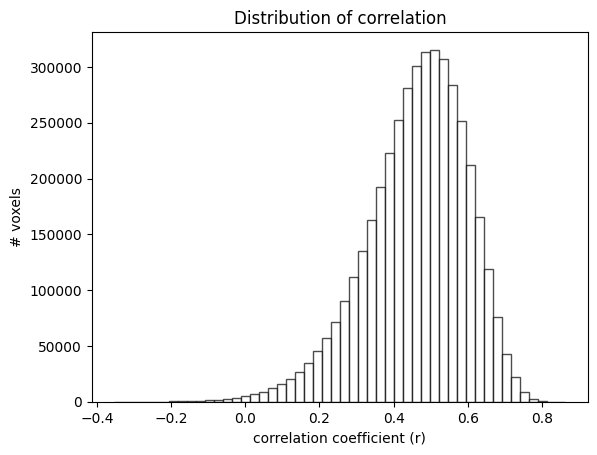

In [58]:
plt.hist(sim_mat.flatten(), bins=50, color='white', alpha=0.7, edgecolor='black')
plt.xlabel('correlation coefficient (r)')
plt.ylabel('# voxels')

plt.title('Distribution of correlation')
plt.show()

In [42]:
sim_mean = np.mean(sim_mat,axis=1)

In [98]:
fc_parcellation.similarity_intersub()

STABILITY ANALYSIS
Overwrite results = False
LOO maps stability already computed 

DONE


RUN PLOTTING SPINAL MAPS
K value = 7
Showing = source
Features = sim
Save figure = True
The plotting is displayed in neurological orientation (Left > Right)


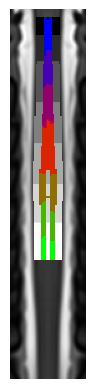

In [36]:
fc_parcellation.plot_spinal_map(showing='source',features='sim',k=7, order='from_file',wta_fc_mean=True,colormap=plt.cm.brg,indiv_algorithm='agglom', group_type='mean', save_figure=True)

In [ ]:
fc_parcellation.compute_similarity_spinal_levels(features='sim',indiv_algorithm='agglom', group_type='mean', save_figure=True)

### Validity
<hr style="border:0.5px solid black">

### Plot validity metrics

In [ ]:
fc_parcellation.plot_validity(k_range=range(3,21),take_mean=True,features='sim',indiv_algorithm='agglom',internal=["SSE", "silhouette", "davies", "calinski"], save_figures=True)

In [ ]:
icap_names = ['SMC','dDME','aDMN','lFrontoPar','rFrontoPar','lVisuel','mVisuel','parietal','auditory','cereb']
main_dir = '/media/miplab-nas2/Data3/BMPD/hc_project/brain_spine/results/fc_parcellation/corr/'
source_tag = 'C1toC7_gm_07_to_iCAP_'
path_dice = '/source/sim/K7/mean_labels/'

In [ ]:
import pandas as pd

# Initialize a 2D array to store the data
data_array = np.zeros((7, 10))

for i,icap in enumerate(icap_names):
    file = main_dir + source_tag + icap + path_dice + source_tag + icap + '_mean_agglom_labels_k7_diag_dice_atlas.txt'
    data = np.loadtxt(file)
    data_array[:, i] = data

# Create a DataFrame from the 2D array
combined_df = pd.DataFrame(data_array,columns=icap_names)

# Print the combined DataFrame
print(combined_df)


In [ ]:
sns.heatmap(combined_df, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)


In [ ]:
# Calculate the mean and SEM
mean_values = combined_df.mean()
sorted_mean_values = mean_values.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot using Seaborn
sns.barplot(x=sorted_mean_values.index, y=sorted_mean_values, color='gray')
# Create the strip plot with error bars
sns.stripplot(data=combined_df, jitter=True, color='black')

# Add labels and title
plt.xlabel('Network')
plt.ylabel('Dice')
plt.ylim(0, 1)
plt.xticks(rotation=90)

# Save the figure as a PDF
plt.savefig(main_dir + 'dice_all.pdf', format='pdf')

# Show the plot
plt.show()

In [ ]:
sorted_mean_values

In [ ]:
# Calculate the mean and SEM
mean_values = combined_df.mean()
sorted_mean_values = mean_values.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(5, 3))

# Create the strip plot with error bars
sns.stripplot(data=combined_df, jitter=True)
plt.bar(sorted_mean_values.index, sorted_mean_values, color='black')  

# Add labels and title
plt.xlabel('Network')
plt.ylabel('Dice')
plt.ylim(0.4, 1);
plt.xticks(rotation=90);
plt.savefig(main_dir + 'dice_all.pdf',format='pdf')

In [ ]:
plt.savefig(main_dir + 'dice_all.pdf',format='pdf')